In [1]:
import scipy.io     # To Load data from matlab files: https://docs.scipy.org/doc/scipy/reference/tutorial/io.html
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read data
mat = scipy.io.loadmat('./Data/A4-SampleData/dataset1-small.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Nov 15 10:39:00 2007',
 '__version__': '1.0',
 '__globals__': [],
 'f0': array([[ 0.00465658],
        [ 0.00627838],
        [-0.00215498],
        ...,
        [ 0.00400786],
        [ 0.00173734],
        [ 0.0053053 ]]),
 'dataset': array(['Simulated small tremor'], dtype='<U22'),
 'samplerate': array(['500 Hz'], dtype='<U6'),
 'info': array(['This is simulated data that has been adjusted for the structure in the South Wing lab'],
       dtype='<U85')}

500


Text(0.5, 1.0, 'Earthquake Data 1 (Small)')

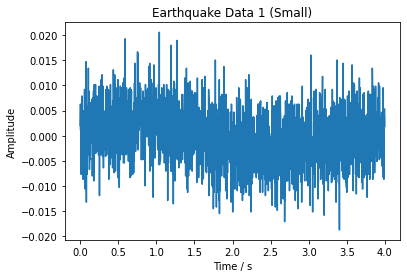

In [48]:

sampleFreq = 500 # Hz
print(sampleFreq)

data = np.ndarray.flatten(mat['f0'])
data = data[-2000:]
t = np.arange(len(data)) / sampleFreq

plt.plot(t, data)
plt.xlabel("Time / s")
plt.ylabel("Amplitude")
plt.title("Earthquake Data 1 (Small)")

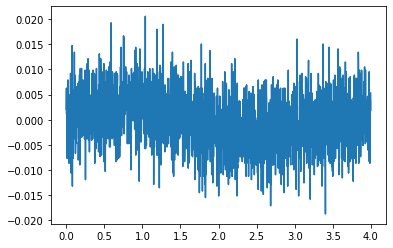

In [57]:
# Apply window
window = np.ones_like(t)
#window = np.hamming(len(t))
data_windowed = data*window
plt.plot(t, data_windowed)

(-1.0, 2.0)

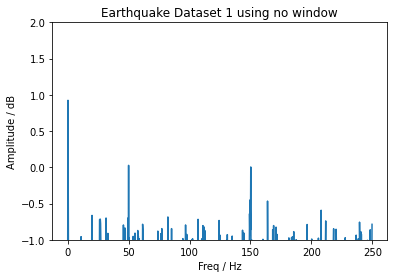

In [58]:
# DFT Analysis
sp = np.fft.fft(data_windowed)
freq = np.fft.fftfreq(len(t), 1/sampleFreq)  # Freq bins

# Remove -ve freq
freq = freq[:int(len(freq)/2)]
sp = sp[:int(len(sp)/2)]

# Take the absolut value of sp
sp = np.absolute(sp)

plt.plot(freq, np.log(sp))
plt.xlabel("Freq / Hz")
plt.ylabel("Amplitude / dB")
plt.title(f"Earthquake Dataset 1 using no window")
plt.ylim(-1,2)

(0.0, 5.0)

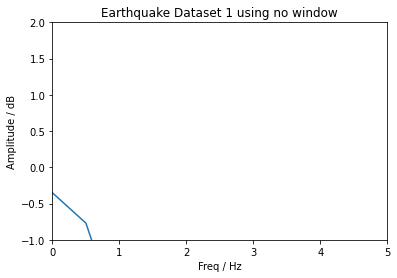

In [37]:
plt.plot(freq, np.log(sp))
plt.xlabel("Freq / Hz")
plt.ylabel("Amplitude / dB")
plt.title(f"Earthquake Dataset 1 using no window")
plt.ylim(-1,2)
plt.xlim(0,5)